# **INTRODUCTION**

The data we are choosing is student performance factors. We gathered this dataset from Kaggle. The dataset provides an overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success. The main interest we are trying to hypothesize is the exam scores.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
mpl.rcParams['figure.dpi']= 300
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import IPython.display
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


# <u>**HYPOTHESES AND OUTLINE**</u>

## **Hypothesis**

We will evaluate the following hypothesis:
1. <u>Parental Education Level and Parental Involvement on Exam Scores:</u> Parental education level and parental involvement are positively correlated, and this relationship indirectly impacts a student’s exam performance for the better.

2. <u>Interaction of Previous Scores and Motivation on Exam Scores:</u> A student’s motivation level moderates the effect of their previous scores on their final exam performance, with highly motivated students showing greater improvement regardless of prior scores.

3. <u>Motivation and Study Habits Interaction:</u> The effect of motivation level on final exam scores might depend on the number of hours studied (interaction between motivation level and hours studied).


### **Outline Of The Steps To Be Taken In Analysis**

1. Data Preparation:
*   Clean and preprocess the dataset
*   Check distributions and transform variables if necessary.

2. Create interaction terms based on the hypotheses above (Feature Engineering)

3. Use tools to examine correlation and determine whether the predictors have direct and indirect impact on exam scores.
Examples:
*   Correlation Matrix
*   Pair Plot
*   Summary Table
*   Plot Graphs

4. Fit models and check model assumptions (e.g., linearity, normality, and multicollinearity).

5. Evaluate model fit and significance of predictors using multiple loss functions/methods for evaluation.

6. Interpret insights on how parental factors, the interaction of motivation and previous scores, and the interaction between motivation and study habits influence exam scores. From there, determine whether the hypotheses hold.

### **Explanation of how the results of the analysis will directly be used to assess the validity of the hypotheses.**

*   Hypothesis 1: A positive correlation and significant regression coefficients for parental education and involvement support their joint impact on exam scores.
*   Hypothesis 2: A significant interaction term and visual plots demonstrating that highly motivated students improve more validate this hypothesis.
*   Hypothesis 3: A significant interaction term and plots showing variation in the relationship between hours studied and exam scores across motivation levels confirm the hypothesis. Also, a significant p-value (p < 0.05) indicates that the effect of hours studied on exam scores depends on motivation level.


# <u>**DESCRIBING THE DATA**</u>
This dataset provides an overview of various factors affecting student performance in exams. It includes categorical variables as well as continuous. These variables provide information on study habits, attendance, parental involvement, and other aspects influencing academic success.


Our target variable (Y) is the Exam Scores
Our predictor variables (X) is everything other variable in the dataset


We'll analyze the data to see if we should drop certain variables or engineer features






---




Citation: lainguyn123. Student performance factors. Kaggle. https://www.kaggle.com/datasets/lainguyn123/student-performance-factors


### Load in the dataset

In [ ]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Cleaning the data

In [ ]:
df.isna().sum()[(df.isna().sum() != 0)]

,0
Teacher_Quality,78
Parental_Education_Level,90
Distance_from_Home,67


Drop these rows with missing values from the dataframe

In [ ]:
df.dropna(inplace=True)
df.shape

(6378, 20)

Map the categorical variables to an integer

In [ ]:
# Create a dictionary to map categorical features to integers
mapping = {}

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object type (categorical)
    if df[col].dtype == 'object':
        # Create a unique mapping for each unique category in the column
        mapping[col] = {category: i for i, category in enumerate(df[col].unique())}
        # Map the categories in the column to their corresponding integers
        df[col] = df[col].map(mapping[col])

# Print the mapping dictionary for reference
print(mapping)

# Now the DataFrame 'df' contains integer representations of categorical variables
df.head()

{'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2}, 'Access_to_Resources': {'High': 0, 'Medium': 1, 'Low': 2}, 'Extracurricular_Activities': {'No': 0, 'Yes': 1}, 'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2}, 'Internet_Access': {'Yes': 0, 'No': 1}, 'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2}, 'Teacher_Quality': {'Medium': 0, 'High': 1, 'Low': 2}, 'School_Type': {'Public': 0, 'Private': 1}, 'Peer_Influence': {'Positive': 0, 'Negative': 1, 'Neutral': 2}, 'Learning_Disabilities': {'No': 0, 'Yes': 1}, 'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2}, 'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}, 'Gender': {'Male': 0, 'Female': 1}}


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,0,7,73,0,0,0,0,0,0,0,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,0,2,1,0,0,1,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,0,2,1,0,0,2,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,0,1,1,0,0,1,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,0,3,1,1,0,2,4,0,1,0,1,70


In [ ]:
# z = np.abs((df - df.mean()) / df.std())
# threshold = 3

# df = df[(z < threshold).all(axis=1)]
# df.shape

In [ ]:
#check how many unique values are in each columns
colDict = {}
for i in df.columns:
  colDict[i] = len(set(df[i]))
for i in sorted(colDict.items(), key=lambda item: item[1], reverse=True):
  print(f'{i[0]}: {i[1]}')

Previous_Scores: 51
Exam_Score: 45
Hours_Studied: 41
Attendance: 41
Tutoring_Sessions: 9
Sleep_Hours: 7
Physical_Activity: 7
Parental_Involvement: 3
Access_to_Resources: 3
Motivation_Level: 3
Family_Income: 3
Teacher_Quality: 3
Peer_Influence: 3
Parental_Education_Level: 3
Distance_from_Home: 3
Extracurricular_Activities: 2
Internet_Access: 2
School_Type: 2
Learning_Disabilities: 2
Gender: 2


All variables with 7 or more unique values will be be treated continuously.

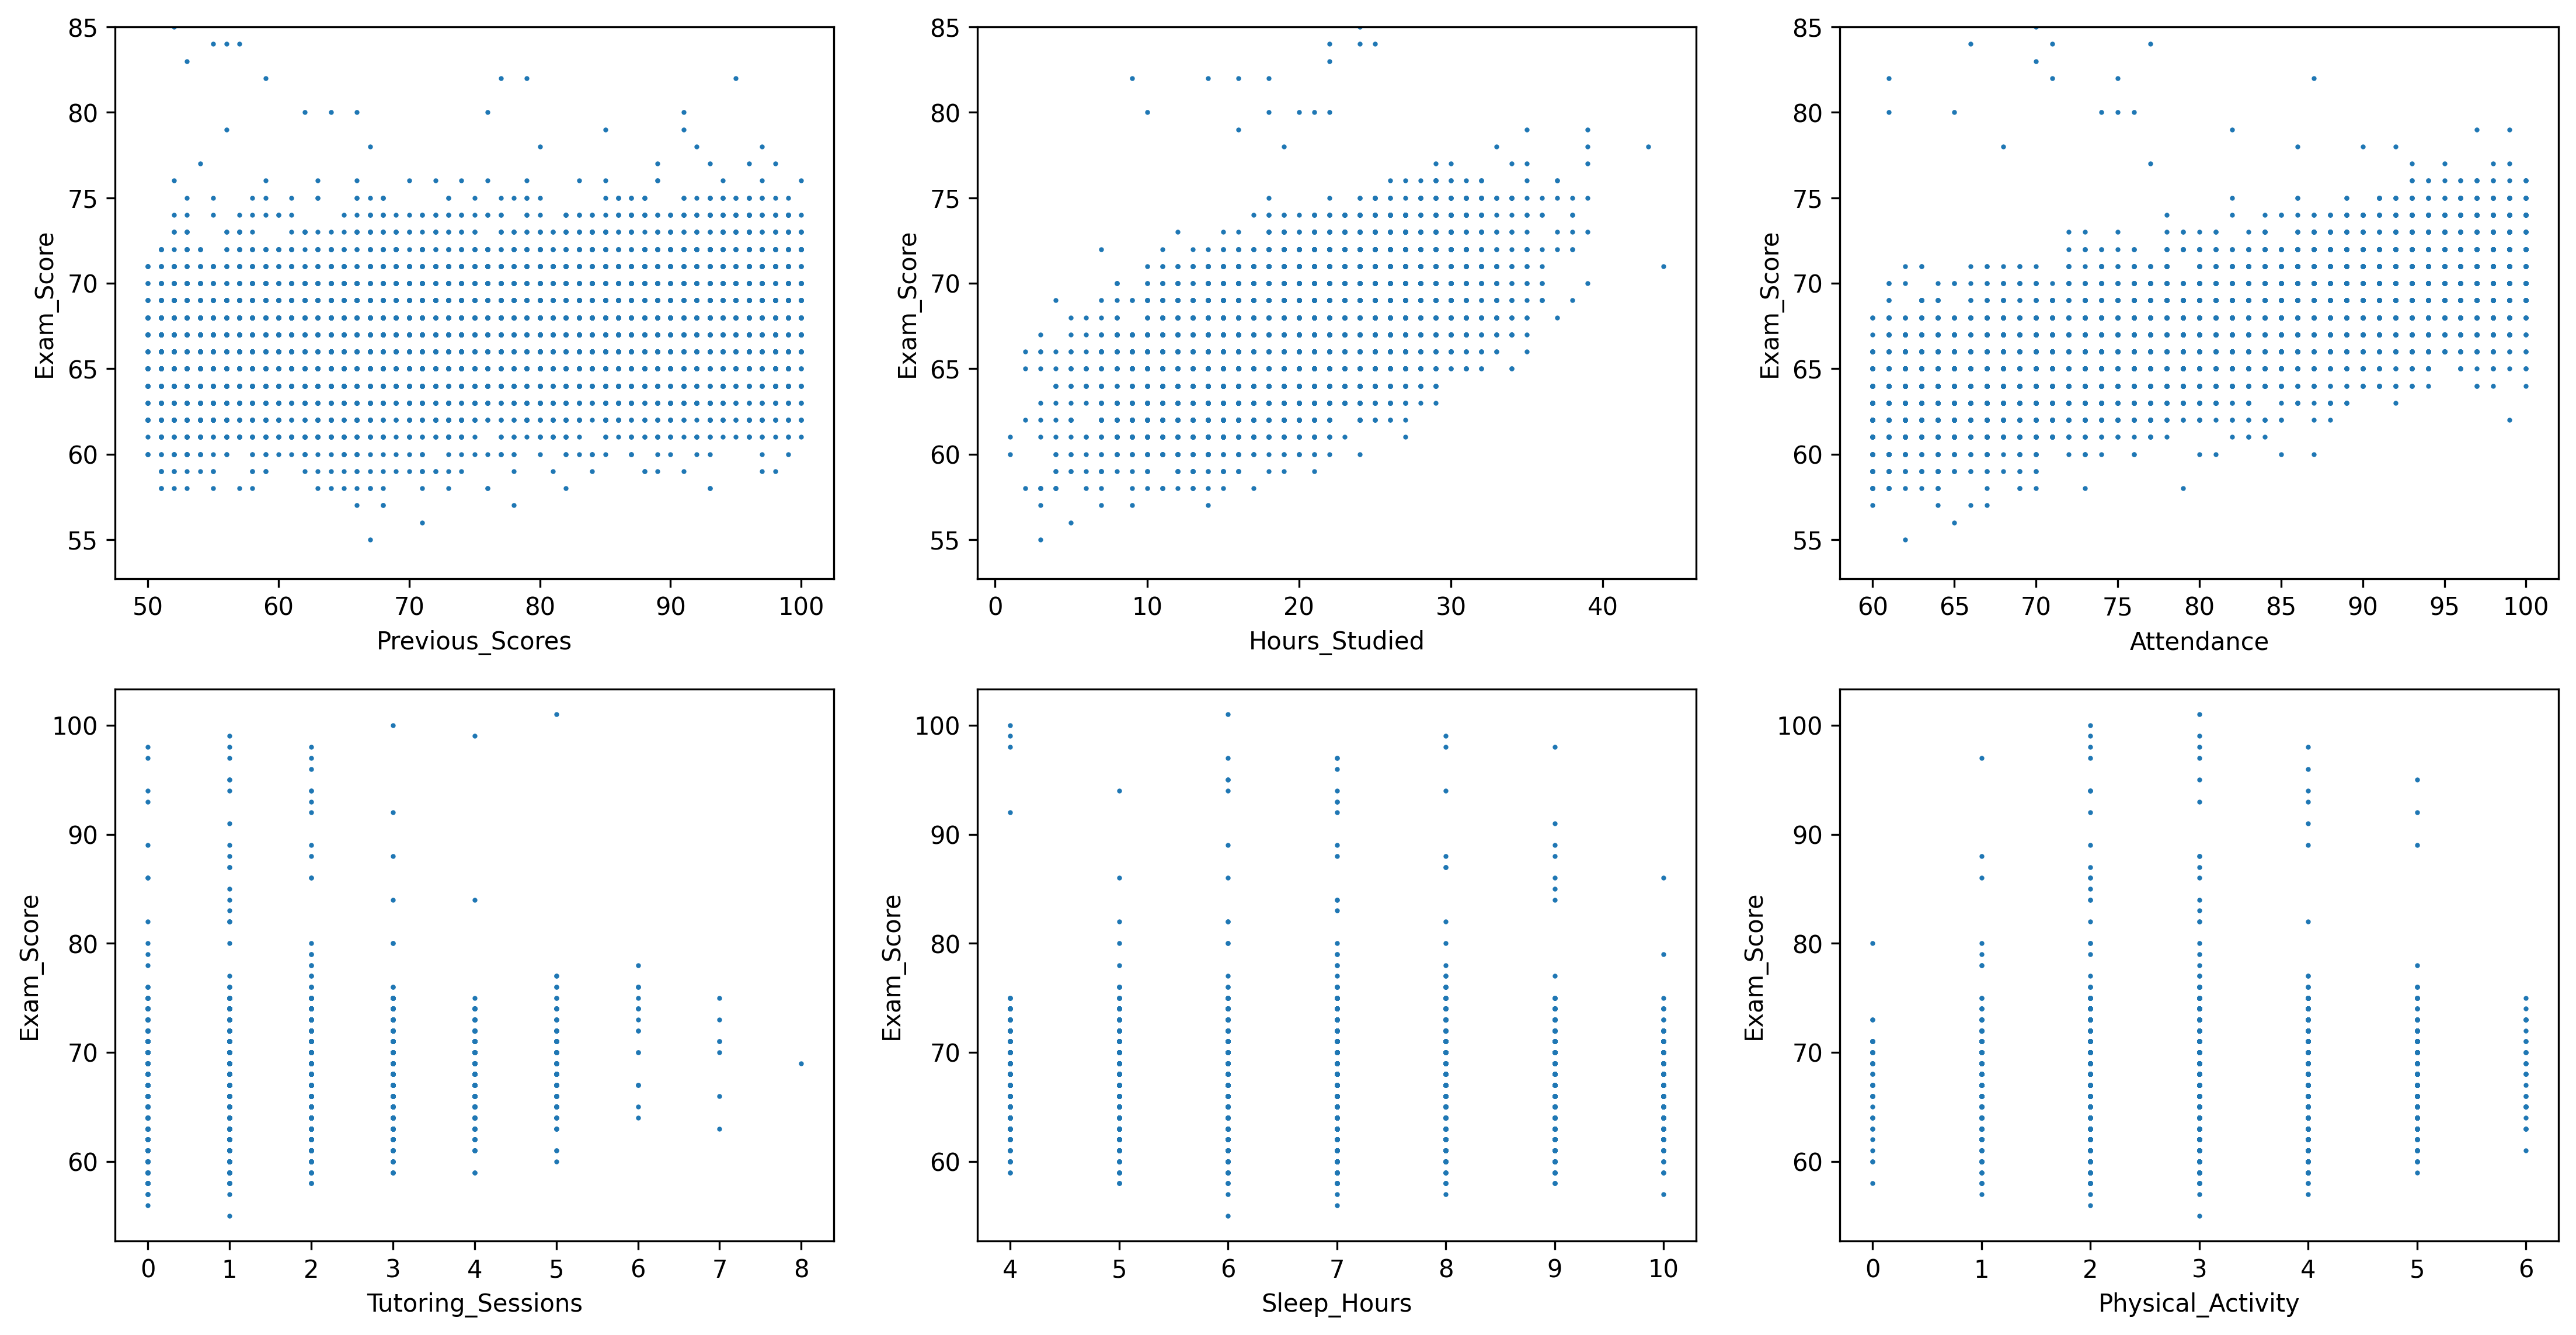

<Figure size 1920x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (18, 9))
#Previous_Scores
ax[0,0].scatter(df['Previous_Scores'], df['Exam_Score'], s=1)
ax[0,0].set_ylim(top=85)
ax[0,0].set_xlabel('Previous_Scores')
ax[0,0].set_ylabel('Exam_Score')
#Hours_Studied
ax[0,1].scatter(df['Hours_Studied'], df['Exam_Score'], s=1)
ax[0,1].set_ylim(top=85)
ax[0,1].set_xlabel('Hours_Studied')
ax[0,1].set_ylabel('Exam_Score')
#Attendance
ax[0,2].scatter(df['Attendance'], df['Exam_Score'], s=1)
ax[0,2].set_ylim(top=85)
ax[0,2].set_xlabel('Attendance')
ax[0,2].set_ylabel('Exam_Score')
#Tutoring_Sessions
ax[1,0].scatter(df['Tutoring_Sessions'], df['Exam_Score'], s=1)
ax[1,0].set_xlabel('Tutoring_Sessions')
ax[1,0].set_ylabel('Exam_Score')
#Sleep_Hours
ax[1,1].scatter(df['Sleep_Hours'], df['Exam_Score'], s=1)
ax[1,1].set_xlabel('Sleep_Hours')
ax[1,1].set_ylabel('Exam_Score')
#Physical_Activity
ax[1,2].scatter(df['Physical_Activity'], df['Exam_Score'], s=1)
ax[1,2].set_xlabel('Physical_Activity')
ax[1,2].set_ylabel('Exam_Score')

plt.show()
plt.savefig('filename.pdf')

More continuous column show linearity with smudges of outliers above. Mostly heteroskedastic. `Tutoring_Sessions` showcase massive heteroskedasity

In [ ]:
df_contin = df.loc[:,['Previous_Scores', 'Hours_Studied', 'Attendance']]

In [ ]:
df_categ = df.loc[:,['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', 'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Peer_Influence', 'Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']]

<Figure size 900x900 with 0 Axes>

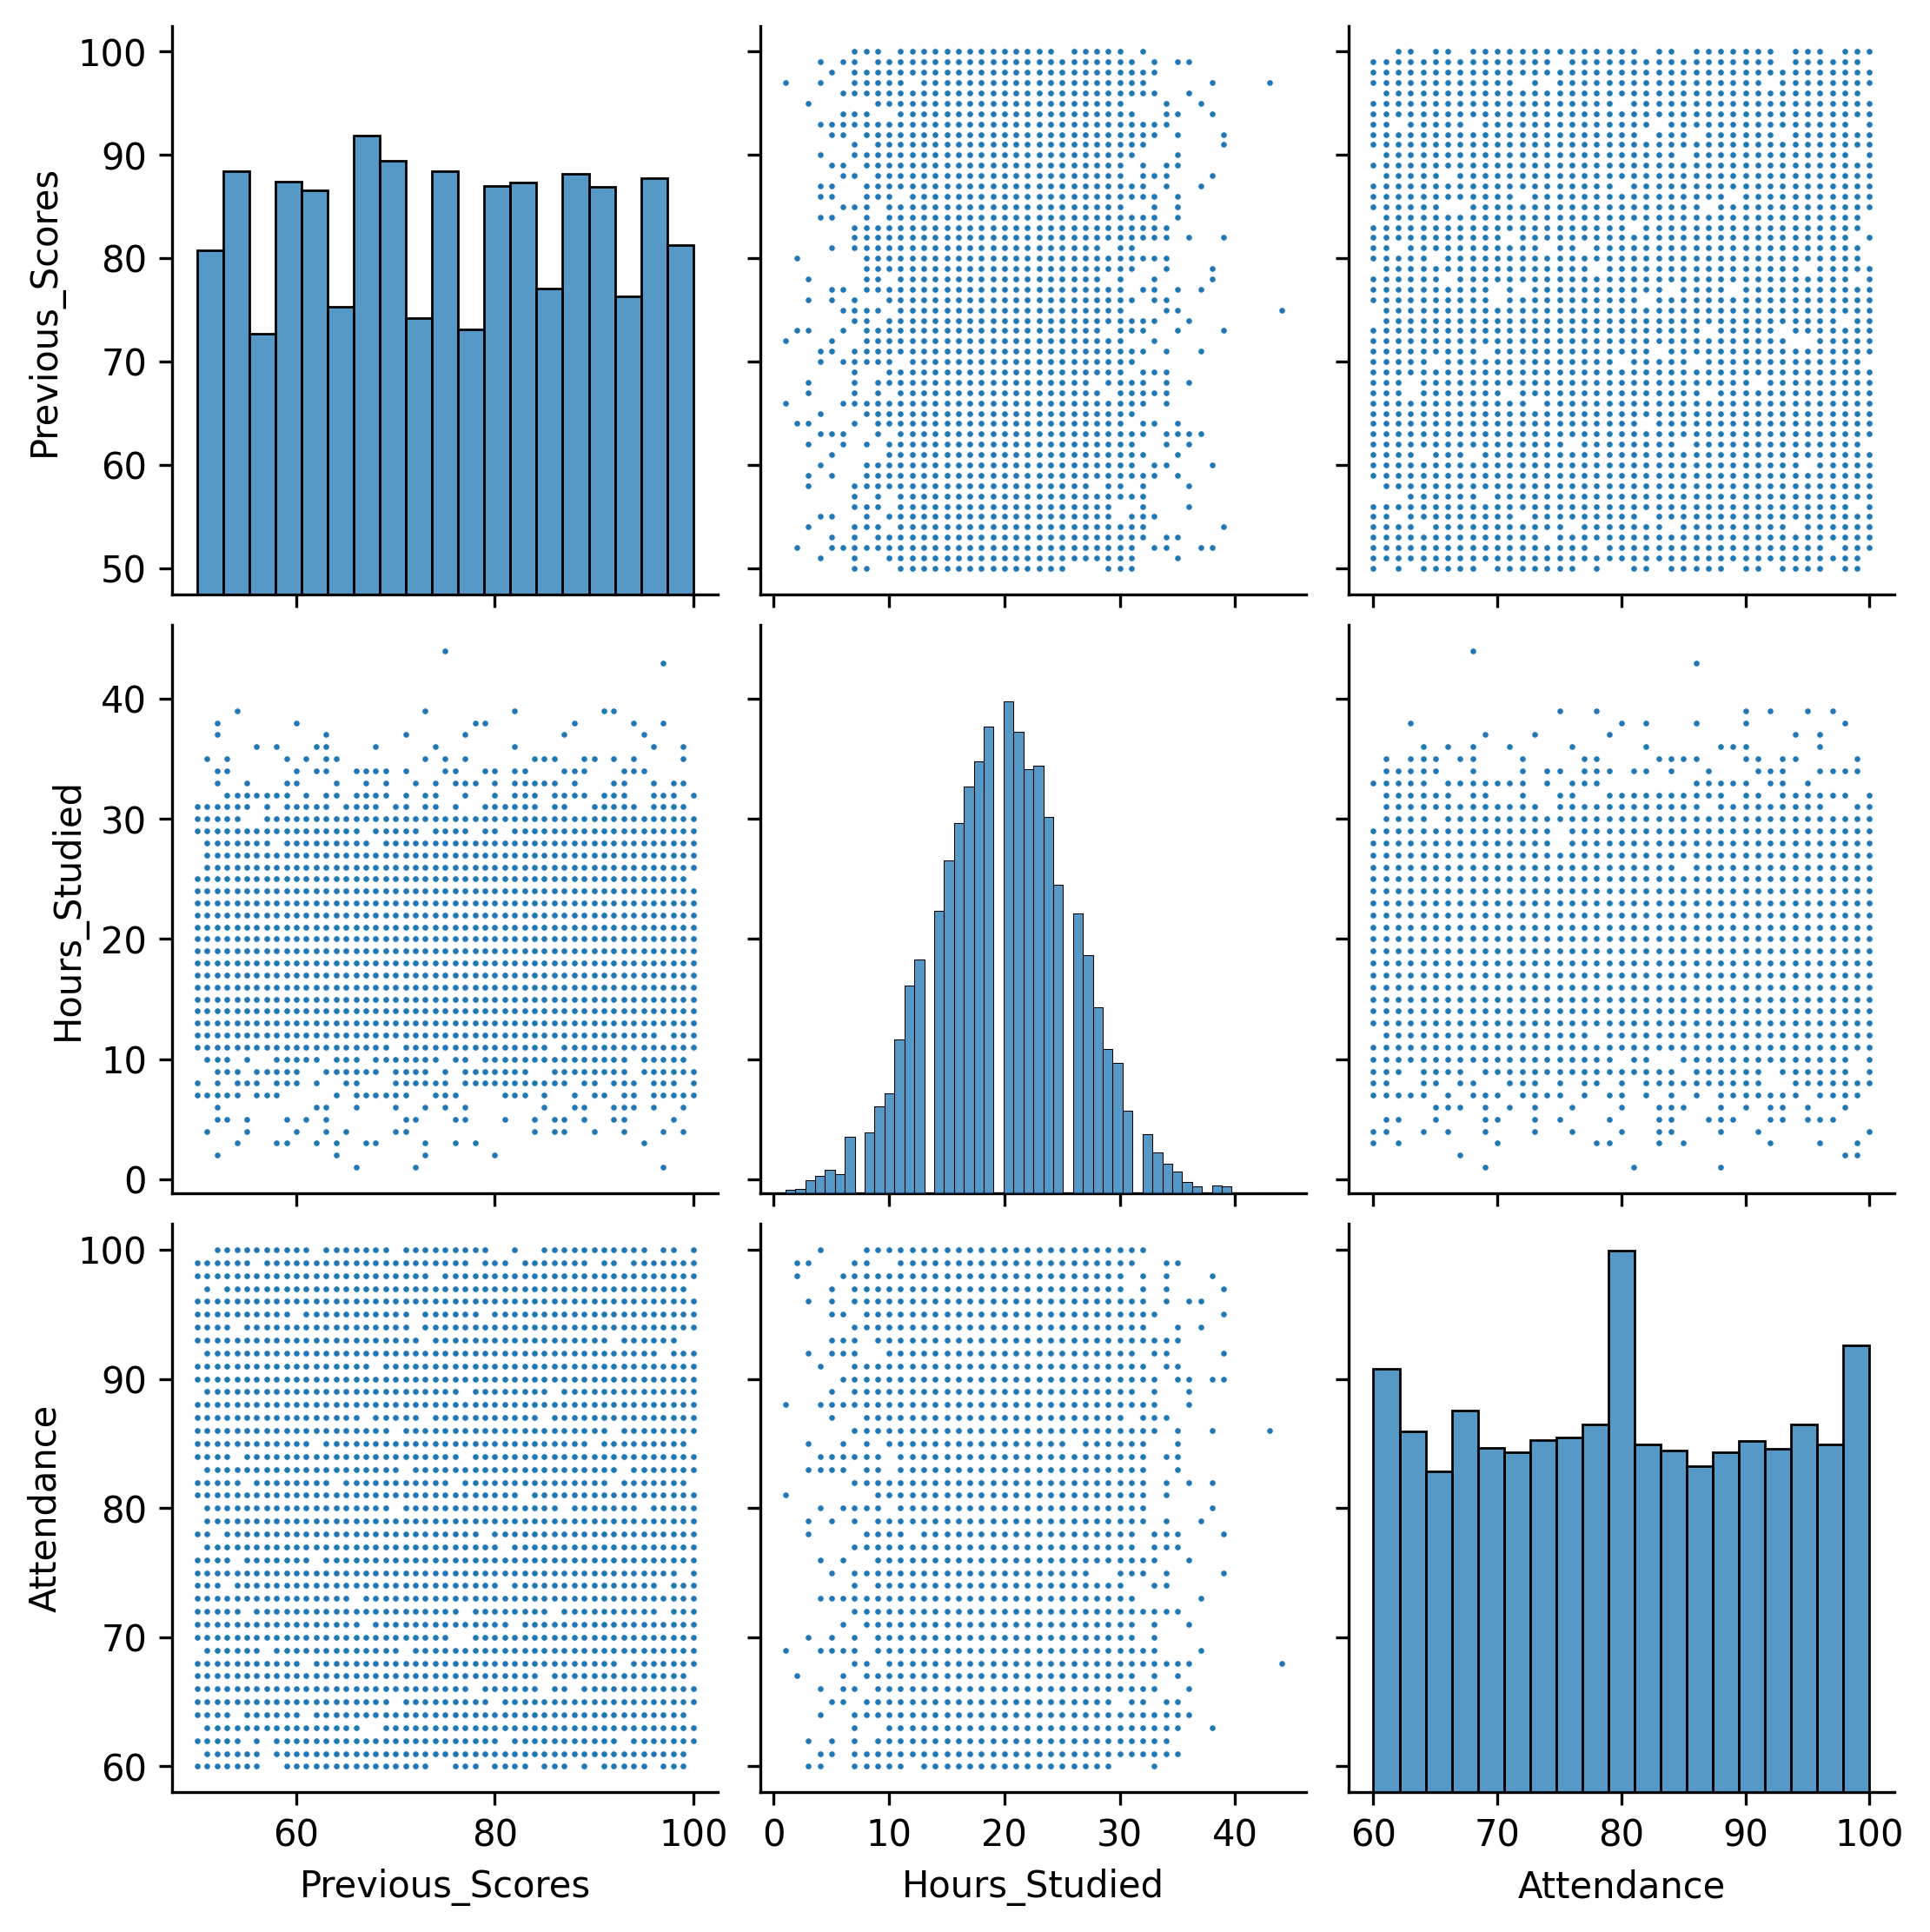

In [ ]:
plt.figure(figsize=(3, 3))
sns.pairplot(df_contin, plot_kws={"s": 3})
plt.show()
# executed at 13 s

There's a remarkable lack of multicollinearity.

Let's try using a correlation matrix

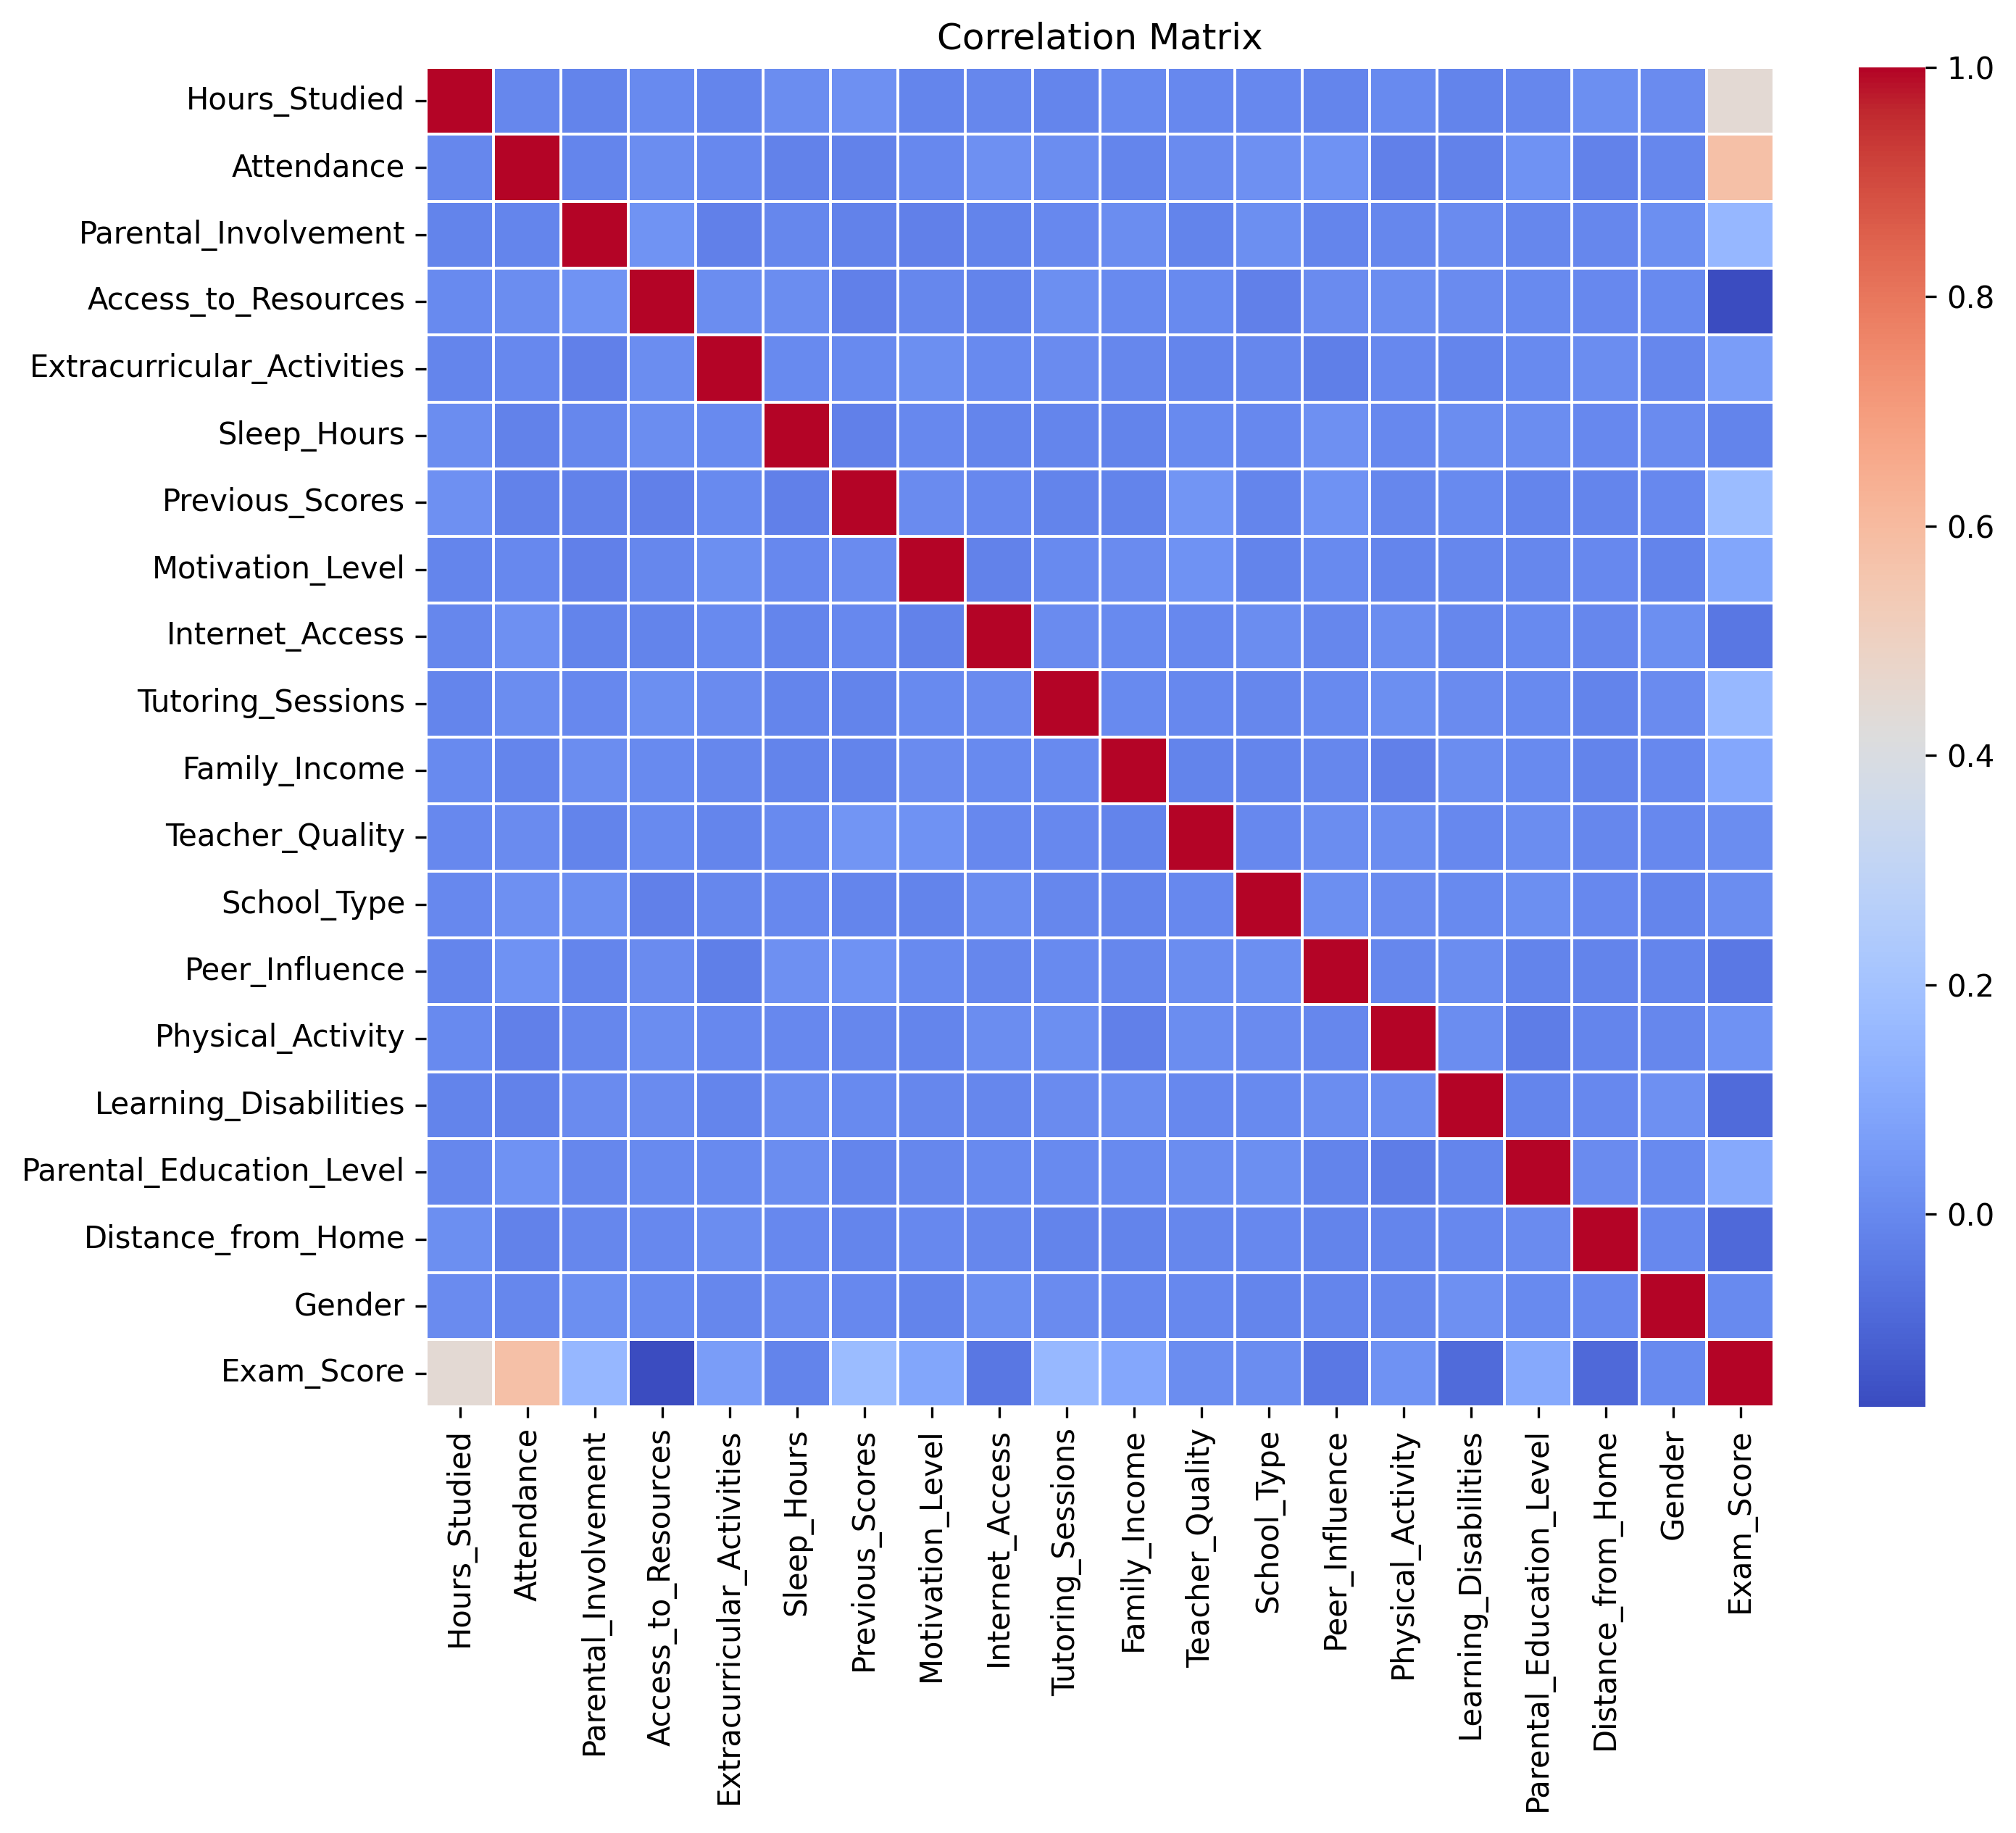

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)#, annot=True
plt.title('Correlation Matrix')
plt.show()

Similar lack of multicollinearity except for the row and column of exam score

In [ ]:
corr_matrix
print(corr_matrix['Exam_Score'])

Hours_Studied                 0.445104
Attendance                    0.580259
Parental_Involvement          0.156014
Access_to_Resources          -0.167856
Extracurricular_Activities    0.063063
Sleep_Hours                  -0.017171
Previous_Scores               0.174283
Motivation_Level              0.088502
Internet_Access              -0.051124
Tutoring_Sessions             0.156829
Family_Income                 0.094555
Teacher_Quality               0.012053
School_Type                   0.010868
Peer_Influence               -0.048290
Physical_Activity             0.025148
Learning_Disabilities        -0.083911
Parental_Education_Level      0.105253
Distance_from_Home           -0.088083
Gender                        0.004932
Exam_Score                    1.000000
Name: Exam_Score, dtype: float64


Print the OLS to see which variables are significant


In [ ]:
x = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']
print(sm.OLS(y, sm.add_constant(x)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     812.9
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:07:40   Log-Likelihood:                -13823.
No. Observations:                6378   AIC:                         2.769e+04
Df Residuals:                    6358   BIC:                         2.782e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`Sleep_Hours`, `School_Type`, `Teacher_Quality`, and `Gender` seem to be insigificant so we'll drop those

In [ ]:
x = x.drop(columns=['Sleep_Hours', 'School_Type', 'Teacher_Quality', 'Gender'])
print(sm.OLS(y, sm.add_constant(x)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1030.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:07:55   Log-Likelihood:                -13823.
No. Observations:                6378   AIC:                         2.768e+04
Df Residuals:                    6362   BIC:                         2.779e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

It seems like the most signficant variables are by coefficient value is `Parental_Involvement` and `Access_to_Resources`. Using the tail end of the 95% confidence interval, the most significant are `Access_to_Resources`, `Internet_Access`, and `Learning_Disabilities`, all 3 are negative

In [ ]:
# dff = df.dropna()
# df_TeaQua = pd.get_dummies(dff['Teacher_Quality']).astype(int).drop(['Medium'], axis=1)
# df_TeaQua.columns = [i + '_Teacher_Quality' for i in df_TeaQua.columns]

# df_ParEdu = pd.get_dummies(dff['Parental_Education_Level']).astype(int).drop(['College'], axis=1)
# df_ParEdu.columns = [i + '_Parental_Education_Level' for i in df_ParEdu.columns]

# df_DisHome = pd.get_dummies(dff['Distance_from_Home']).astype(int).drop(['Moderate'], axis=1)
# df_DisHome.columns = [i + '_Distance_from_Home' for i in df_DisHome.columns]

# df_ParInv = pd.get_dummies(dff['Parental_Involvement']).astype(int).drop(['Medium'], axis=1)
# df_ParInv.columns = [i + '_Parental_Involvement' for i in df_ParInv.columns]

# df_AccRes = pd.get_dummies(dff['Access_to_Resources']).astype(int).drop(['Medium'], axis=1)
# df_AccRes.columns = [i + '_Access_to_Resources' for i in df_AccRes.columns]

# df_MotLev = pd.get_dummies(dff['Motivation_Level']).astype(int).drop(['Medium'], axis=1)
# df_MotLev.columns = [i + '_Motivation_Level' for i in df_MotLev.columns]

# df_FamInc = pd.get_dummies(dff['Family_Income']).astype(int).drop(['Medium'], axis=1)
# df_FamInc.columns = [i + '_Family_Income' for i in df_FamInc.columns]

# df_PeerInf = pd.get_dummies(dff['Peer_Influence']).astype(int).drop(['Neutral'], axis=1)
# df_PeerInf.columns = [i + '_Peer_Influence' for i in df_PeerInf.columns]

# df_ExCur = (dff['Extracurricular_Activities'] == 'Yes').astype(int)

# df_IntAcc = (dff['Internet_Access'] == 'Yes').astype(int)

# df_PriSch = (dff['School_Type'] == 'Private').astype(int)
# df_PriSch.name = 'Private_School'

# df_LerDis = (dff['Learning_Disabilities'] == 'Yes').astype(int)

# df_Fem = (dff['Gender'] == 'Female').astype(int)
# df_Fem.name = 'Female'

# df_prevScoreMotLev = df_MotLev.mul(dff['Previous_Scores'], axis=0)
# df_prevScoreMotLev.columns = ['Previous_Scores_*_' + i for i in df_MotLev.columns]

# df_categ = pd.concat([df_TeaQua, df_ParEdu, df_DisHome, df_ParInv, df_AccRes, df_MotLev, df_FamInc, df_PeerInf, df_ExCur, df_IntAcc, df_PriSch, df_LerDis, df_Fem, df_prevScoreMotLev],axis=1)
# df_categ

In [ ]:
#df_contin = dff.loc[:,['Previous_Scores', 'Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Sleep_Hours', 'Physical_Activity']]

#df_x = pd.concat([df_contin, df_categ],axis=1)

The OLS tells us that `Sleep_Hours`, `Private_School`, and `Female` aren't very significant.

In [ ]:
#print(sm.OLS(dff['Exam_Score'], sm.add_constant(df_x.drop(['Sleep_Hours', 'Private_School', 'Female'], axis=1))).fit().summary())

KeyError: "['Private_School', 'Female'] not found in axis"

In [ ]:
#df_x = df_x.drop(columns=['Previous_Scores_*_High_Motivation_Level', 'Previous_Scores_*_Low_Motivation_Level'])

KeyError: "['Previous_Scores_*_High_Motivation_Level', 'Previous_Scores_*_Low_Motivation_Level'] not found in axis"

# <u>**MODEL TRAINING**</u>

We fit a Linear Regression, Lasso, Random Forest, and KNN model with our training data, score it using the validation set, and finetune using grid search to get a final model scored using the test set

We use the following split for model training

25% - Test
25% - Validation
50% - Training

In [ ]:
x = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

x_split, x_test, y_split, y_test = train_test_split(x,y, test_size=0.25, random_state=528491)
x_train, x_val, y_train, y_val = train_test_split(x_split, y_split, test_size=(1/3), random_state=528491) # 0.75 * (1/3) = 0.25

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
LinRegModel = LinearRegression().fit(x_train, y_train) #fit model

#score it on the validation set
y_pred_val = LinRegModel.predict(x_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Linear Regression: ")
print(f"Validation MSE: {mse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation R^2: {LinRegModel.score(x_val, y_val)}")

#finetune it using gridsearch
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

newLinRegModel = GridSearchCV(LinearRegression(), param_grid, scoring='r2', cv=5)
newLinRegModel.fit(x_train, y_train)

#score on the test set
y_pred_test = newLinRegModel.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print()
print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R^2: {newLinRegModel.score(x_test, y_test)}")

Validation MSE: 4.199801170936058
Validation MAE: 0.625986226710434
Validation R^2: 0.719507263401229

Test MSE: 3.7702858942795494
Test MAE: 0.5916397194119857
Test R^2: 0.7351348194615213


In [ ]:
LassoModel = Lasso().fit(x_train, y_train)

y_pred_val = LassoModel.predict(x_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Lasso Regression: ")
print(f"Validation MSE: {mse_val}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_val)}")
print(f"Validation R^2: {LassoModel.score(x_val, y_val)}")

param_grid = {
    'alpha': [0.0, 0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

newLassoModel = GridSearchCV(Lasso(), param_grid, scoring='r2', cv=5)
newLassoModel.fit(x_train, y_train)

y_pred_test = newLassoModel.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print()
print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R^2: {newLassoModel.score(x_test, y_test)}")


Validation MSE: 6.29798796092234
Validation MAE: 1.4512091733073933
Validation R^2: 0.579375354611968

Test MSE: 3.7702858942795494
Test MAE: 0.5916397194119852
Test R^2: 0.7351348194615213


In [ ]:
RandomForestModel = RandomForestRegressor(random_state=0).fit(x_train, y_train)

y_pred_val = RandomForestModel.predict(x_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Random Forest Regression: ")
print(f"Validation MSE: {mse_val}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_val)}")
print(f"Validation R^2: {RandomForestModel.score(x_val, y_val)}")

param_grid = {
    'n_estimators': [50, 100, 120],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

newRandomForestModel = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, scoring='r2', cv=5)
newRandomForestModel.fit(x_train, y_train)

y_pred_test = newRandomForestModel.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print()
print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Test R^2: {newRandomForestModel.score(x_test, y_test)}")


Random Forest Regression: 
Validation MSE: 5.547891786833856
Validation MAE: 1.1865579937304074
Validation R^2: 0.6294721377735988

Test MSE: 4.813119974759321
Test MAE: 1.1249319232846968
Test R^2: 0.6618750071440966


In [ ]:
knnModel = KNN(n_neighbors=40, metric = 'euclidean').fit(x_train, y_train)

y_pred_val = knnModel.predict(x_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Nearest Neighbors Regression: ")
print(f"Validation MSE: {mse_val}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_val)}")
print(f"Validation R^2: {knnModel.score(x_val, y_val)}")

param_grid = {
    'n_neighbors': [20, 45, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

newKNNModel = GridSearchCV(KNN(), param_grid, scoring='r2', cv=5)
newKNNModel.fit(x_train, y_train)

y_pred_test = newKNNModel.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print()
print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Test R^2: {newKNNModel.score(x_test, y_test)}")



Nearest Neighbors Regression: 
Validation MSE: 6.229239028213167
Validation MAE: 1.4489655172413796
Validation R^2: 0.5839668996611216

Test MSE: 5.567566426660265
Test MAE: 1.3229354675113045
Test R^2: 0.6088746243369085


In [ ]:
# Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

# Score it on the validation set
y_pred_val = gb_model.predict(x_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = gb_model.score(x_val, y_val)

print("Gradient Boosting Regression: ")
print(f"Validation MSE: {mse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation R^2: {r2_val}")

# Fine-tune Gradient Boosting model using GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=528491), param_grid, scoring='r2', cv=5, n_jobs=-1)
gb_grid_search.fit(x_train, y_train)

# Score on the test set with the fine-tuned model
y_pred_test = gb_grid_search.best_estimator_.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = gb_grid_search.best_estimator_.score(x_test, y_test)

print()
print(f"Best Parameters: {gb_grid_search.best_params_}")
print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R^2: {r2_test}")


Gradient Boosting Regression: 
Validation MSE: 4.585448532824115
Validation MAE: 0.8535846645348665
Validation R^2: 0.693750976497302

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 150}
Test MSE: 4.051795320568849
Test MAE: 0.7569208519762464
Test R^2: 0.7153585883989041


# <u>**MODEL COMPARISON AND EVALUATION**</u>

# <u>**CONCLUSIONS AND IMPLICATIONS**</u>